In [45]:
%reload_ext autoreload
%autoreload 2

In [91]:
from kidney_kids.scatters import *

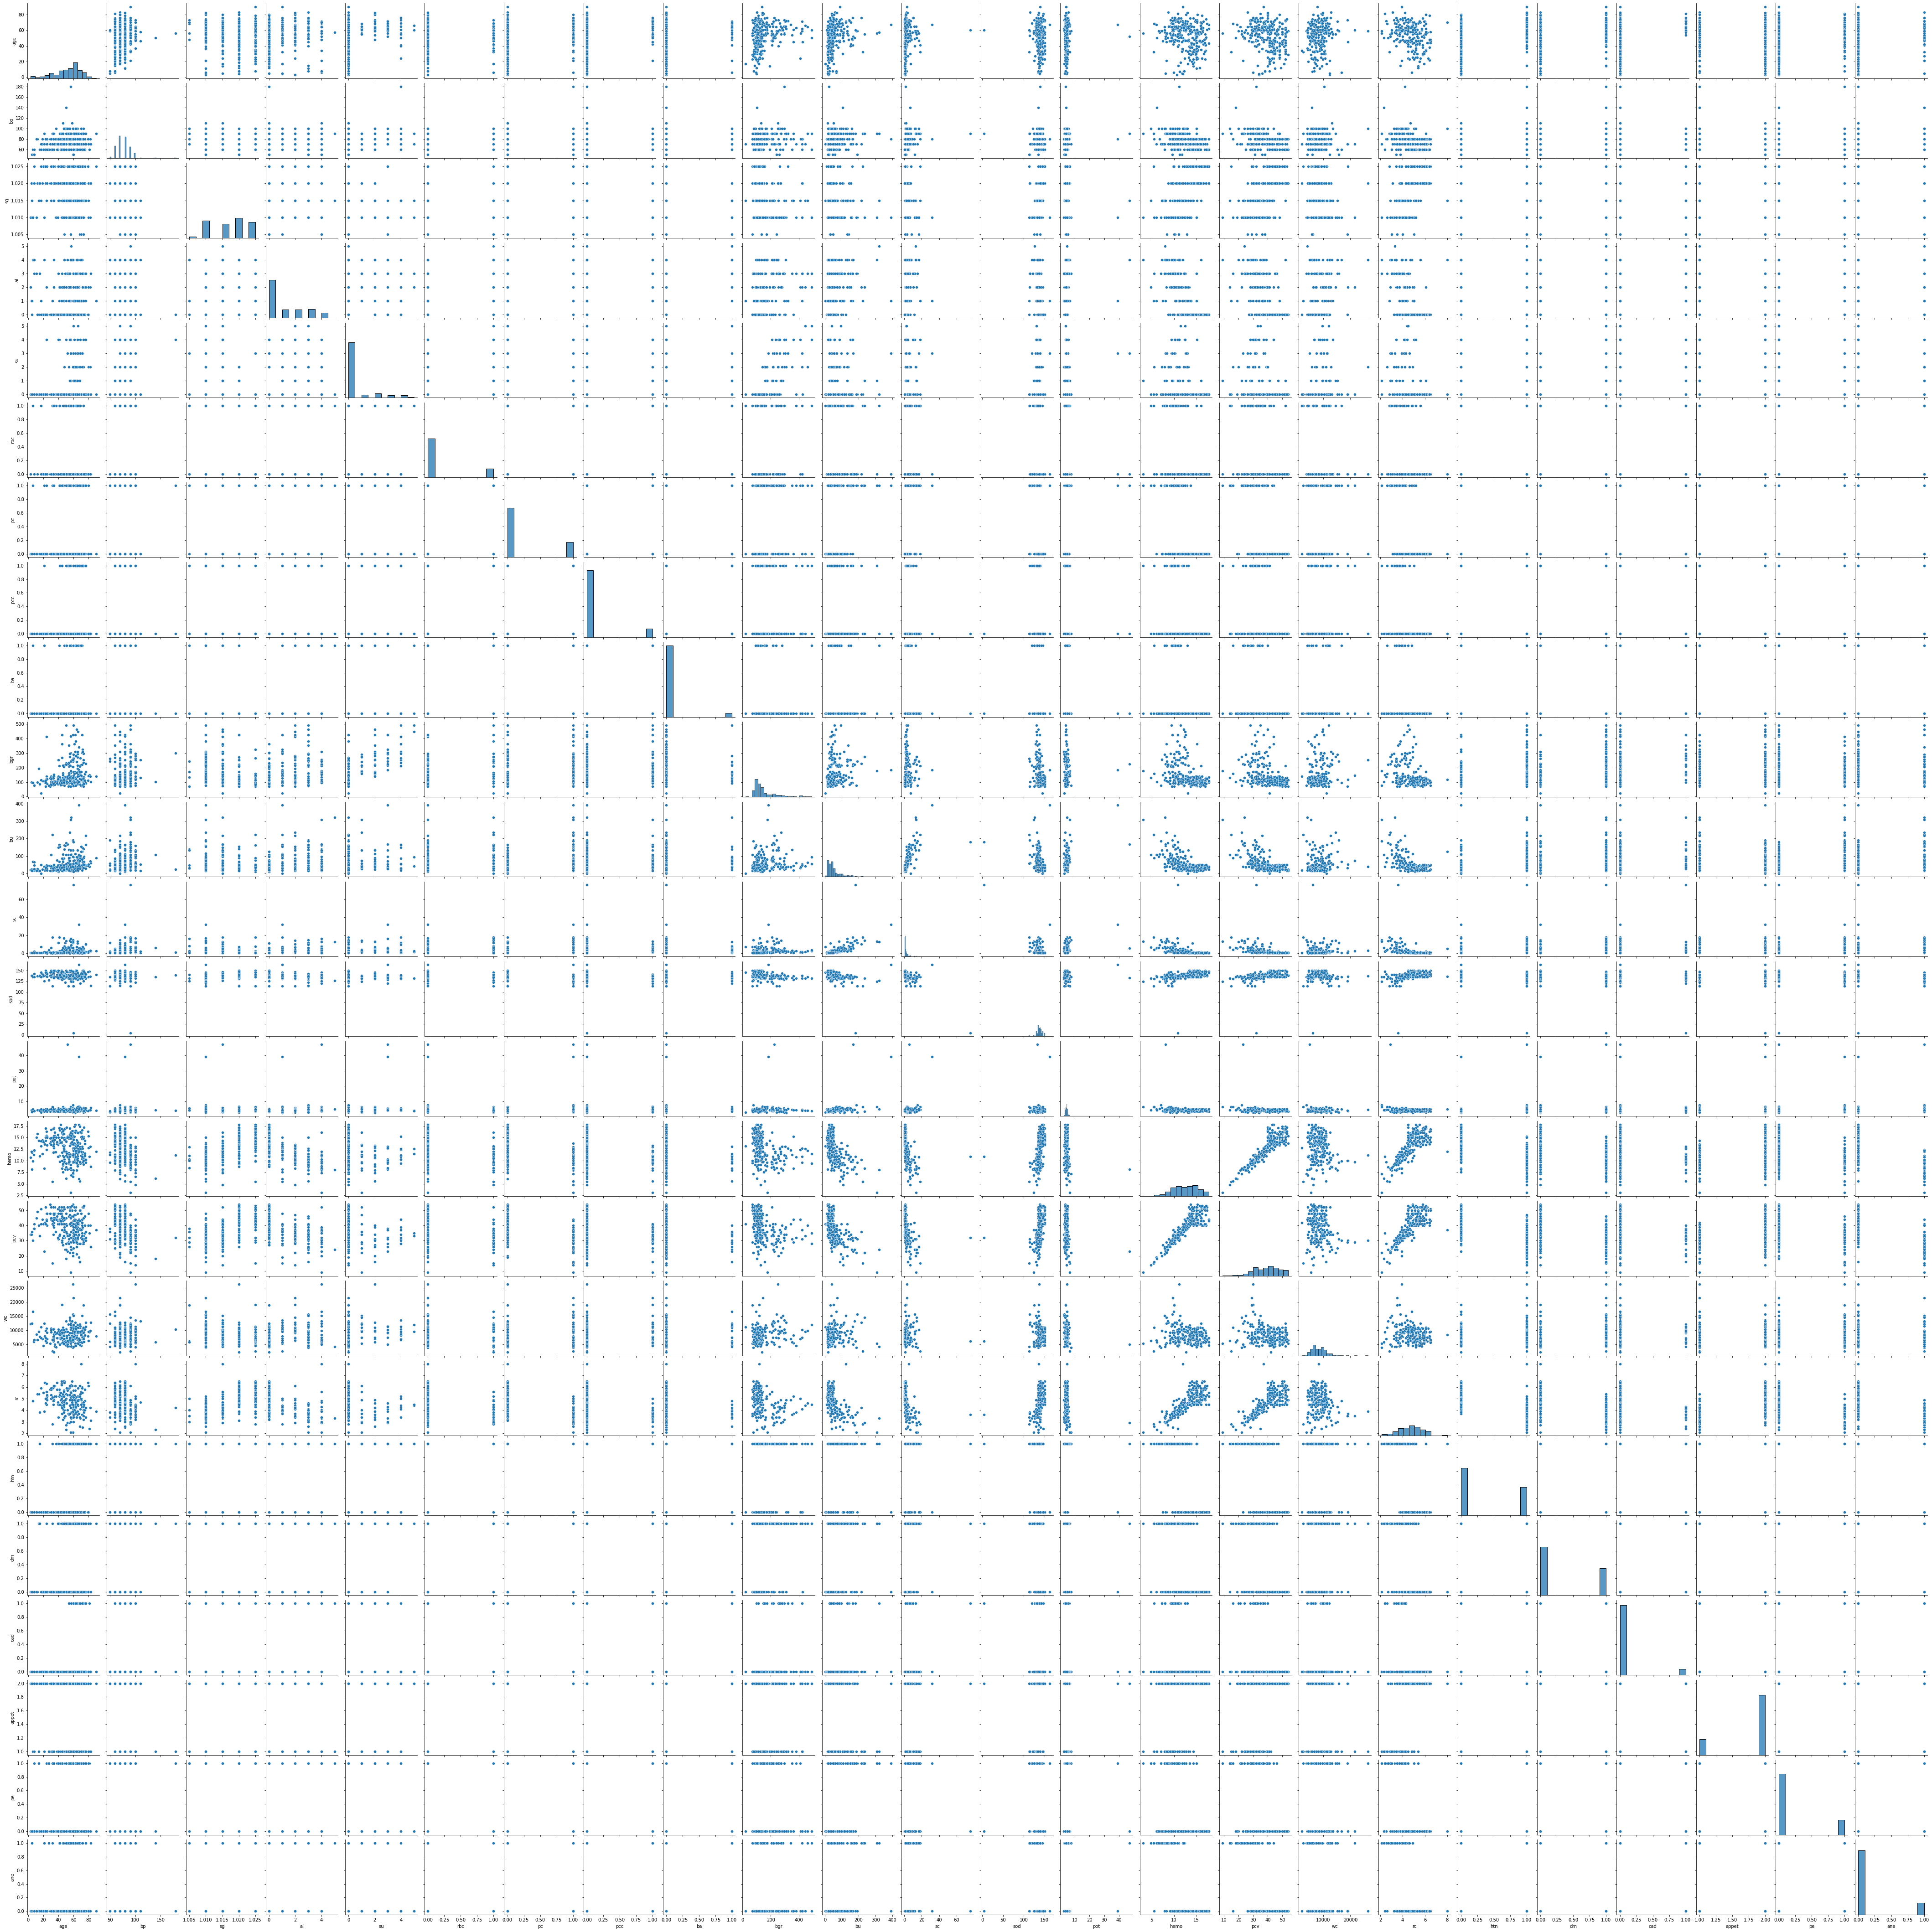

In [98]:
sns.pairplot(get_cleaned_data()[0])

In [93]:
get_cleaned_data()[2]

218    1
124    1
362    0
158    1
239    1
      ..
111    1
96     1
282    0
236    1
148    1
Name: classification, Length: 320, dtype: int64

In [103]:
get_preproc_data(get_cleaned_data()[0])

,ord_trans__sg,ord_trans__al,ord_trans__su,bin_trans__rbc,bin_trans__pc,bin_trans__pcc,bin_trans__ba,bin_trans__htn,bin_trans__dm,bin_trans__cad,...,cont_trans__bp,cont_trans__bgr,cont_trans__bu,cont_trans__sc,cont_trans__sod,cont_trans__pot,cont_trans__hemo,cont_trans__pcv,cont_trans__wc,cont_trans__rc
0,0.25,0.8,0.2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.076923,0.402381,0.125984,0.050331,0.835962,0.065169,0.435374,0.444444,0.219008,0.220339
1,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.026190,0.013123,0.000000,0.861199,0.024719,0.809524,0.822222,0.342975,0.542373
2,0.25,0.4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.307692,0.128571,0.112861,0.023841,0.837900,0.049230,0.598639,0.666667,0.255933,0.441693
3,0.75,0.6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.076923,0.130952,0.028871,0.010596,0.835962,0.020225,0.809524,0.822222,0.255933,0.441693
4,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.202572,0.290476,0.013123,0.003974,0.835962,0.038202,0.761905,0.688889,0.301653,0.559322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.307692,0.180800,0.446194,1.000000,0.000000,0.049230,0.530612,0.511111,0.165289,0.254237
316,0.50,0.4,0.6,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.230769,0.180800,0.052493,0.007947,0.837900,0.049230,0.741497,0.733333,0.524793,0.441693
317,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230769,0.116667,0.018373,0.009272,0.823344,0.049438,0.836735,0.733333,0.165289,0.694915
318,0.50,0.6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.180800,0.062992,0.009272,0.837900,0.049230,0.523810,0.533333,0.255933,0.441693


In [94]:
get_imputed_data(get_cleaned_data()[0])

,ord_trans__sg,ord_trans__al,ord_trans__su,bin_trans__rbc,bin_trans__pc,bin_trans__pcc,bin_trans__ba,bin_trans__htn,bin_trans__dm,bin_trans__cad,...,cont_trans__bp,cont_trans__bgr,cont_trans__bu,cont_trans__sc,cont_trans__sod,cont_trans__pot,cont_trans__hemo,cont_trans__pcv,cont_trans__wc,cont_trans__rc
0,1.010,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,151.698246,17.0,0.8,137.194882,4.688142,15.000000,45.000000,8600.000000,4.690826
1,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,132.000000,18.0,1.1,150.000000,4.700000,15.400000,42.000000,11000.000000,4.500000
2,1.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,80.000000,25.0,0.9,146.000000,3.500000,14.100000,48.000000,7800.000000,5.100000
3,1.015,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,70.0,127.000000,19.0,1.0,134.000000,3.600000,12.459058,38.666667,8437.021277,4.690826
4,1.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.0,151.698246,20.0,0.7,137.194882,4.688142,12.459058,38.666667,8437.021277,4.690826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,74.000000,41.0,0.5,143.000000,4.500000,15.100000,48.000000,9700.000000,5.600000
316,1.015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110.0,130.000000,16.0,0.9,137.194882,4.688142,12.459058,38.666667,8437.021277,4.690826
317,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,128.000000,30.0,1.2,140.000000,4.500000,15.200000,52.000000,4300.000000,5.700000
318,1.025,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,70.0,117.000000,52.0,2.2,136.000000,3.800000,10.000000,30.000000,19100.000000,3.700000


In [95]:
def scatter(feat1, feat2):

    X_train = get_cleaned_data()[0]
    df = get_imputed_data(X_train)
    target = get_cleaned_data()[2]

    feat_1 = df[f'{feat1}']
    feat_2 = df[f'{feat2}']

    return sns.scatterplot(data=df, x=feat_1, y=feat_2, hue=target)

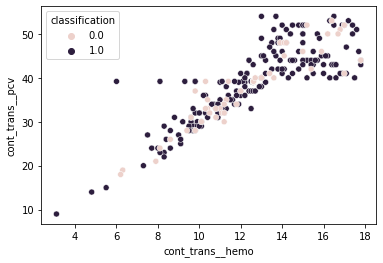

In [104]:
scatter('cont_trans__hemo', 'cont_trans__pcv');

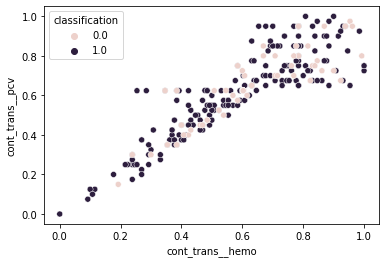

In [96]:
scatter_preproc('cont_trans__hemo', 'cont_trans__pcv');